# House Prices - Part 1- Masomeh_Aliheydarloo

### 1. Understanding the Problem

The goal of this project is to predict housing prices. Given that our target varible (prices) are continuous in nature, we are trying to solve a regression problem.

Given that we are focused on obtaining the most accurate predictions, we just need to select the model that performs the best, given an evaluation metric.

For this project, the evaluation metric chosen is the Root Mean Squared Error (RMSE), and we will be trying to find the model that gives us the lowest RMSE.

The models that we will be considering in this notebook include:

Linear Models : ElasticNet and Lasso Regression

Ensemble Models : Gradient Boosting and XGBOOST Regression

### 2- Understanding the Data

### 2.1 - Imports the crucial libraries and load data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load train data
df=pd.read_csv('F:/DataScience-Tosee/Final Project/House Codes/train_data.csv')
#Load test data
dff=pd.read_csv('F:/DataScience-Tosee/Final Project/House Codes/test_data.csv')

In [3]:
#Make copy from main datasets
dftrain=df.copy()
dftest=dff.copy()

### 2.2- Identifying the types of features

In [4]:
# Quick scan for missing values and wrong datatypes
dftrain.info()

In [5]:
dftest.info()

In [6]:
dftrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1314.0,56.815068,42.143591,20.0,20.00,50.0,70.00,190.0
LotFrontage,1084.0,70.047970,24.550540,21.0,59.00,69.0,80.00,313.0
LotArea,1314.0,10433.886606,9443.074309,1300.0,7536.25,9485.0,11600.00,215245.0
OverallQual,1314.0,6.109589,1.380481,1.0,5.00,6.0,7.00,10.0
OverallCond,1314.0,5.594368,1.119922,1.0,5.00,5.0,6.00,9.0
YearBuilt,1314.0,1971.146119,30.349148,1872.0,1954.00,1972.5,2000.00,2010.0
YearRemodAdd,1314.0,1984.848554,20.600410,1950.0,1967.00,1993.0,2004.00,2010.0
MasVnrArea,1307.0,103.751339,179.572736,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1314.0,447.638508,458.746136,0.0,0.00,389.0,715.50,5644.0
BsmtFinSF2,1314.0,47.028919,162.842821,0.0,0.00,0.0,0.00,1474.0


In [7]:
dftrain.shape

(1314, 80)

In [8]:
dftest.shape

(1605, 79)

### 2.3- Uni-variate Analysis – Exploring each variables:

#### Identifying and Correcting variable's data types

In [9]:
dftrain['KitchenQual'] = dftrain['KitchenQual'].astype('object')
dftest['KitchenQual'] = dftest['KitchenQual'].astype('object')

In [10]:
dftrain['OverallQual'] = dftrain['OverallQual'].astype('object')
dftest['OverallQual'] = dftest['OverallQual'].astype('object')
dftrain['OverallCond'] = dftrain['OverallCond'].astype('object')
dftest['OverallCond'] = dftest['OverallCond'].astype('object')

In [11]:
dftrain['MSSubClass'] = dftrain['MSSubClass'].astype('object')
dftest['MSSubClass'] = dftest['MSSubClass'].astype('object')
dftrain['MoSold'] = dftrain['MoSold'].astype('object')
dftest['MoSold'] = dftest['MoSold'].astype('object')

In [12]:
dftrain['MSSubClass'].unique()

array([60, 20, 70, 50, 190, 45, 120, 30, 85, 90, 80, 160, 75, 180, 40],
      dtype=object)

In [13]:
dftrain['MoSold'].unique()

array([2, 5, 9, 12, 10, 8, 4, 1, 7, 3, 6, 11], dtype=object)

In [14]:
dftrain['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [15]:
dftrain['ExterCond'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [16]:
dftrain['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa', nan], dtype=object)

In [17]:
dftrain['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Po'], dtype=object)

In [18]:
dftrain['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

####  Target Variable : SalePrice 

First, we look at the distribution of the target variable and check for any negative values.
Next, let's check the distribution and skewness of the target.

In [19]:
#descriptive statistics summary
dftrain['SalePrice'].describe()

count      1314.000000
mean     181307.531202
std       78402.449093
min       34900.000000
25%      130000.000000
50%      163250.000000
75%      214375.000000
max      745000.000000
Name: SalePrice, dtype: float64

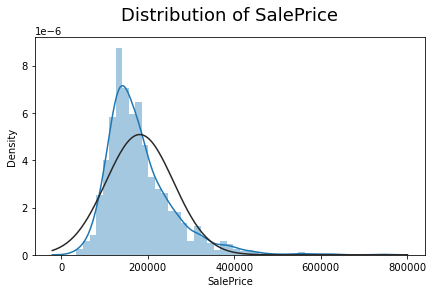

In [20]:
import scipy.stats as stats

fig = plt.figure(figsize=(7,4))
ax = sns.distplot(dftrain.SalePrice, fit=stats.norm)
ax.set_title('Distribution of SalePrice', size=18, y=1.05)
plt.show();

In [21]:
#skewness and kurtosis
print("Skewness: %f" % dftrain['SalePrice'].skew())
print("Kurtosis: %f" % dftrain['SalePrice'].kurt())

Skewness: 1.746510
Kurtosis: 5.426633


Deviate from the normal distribution. Have positive skewness.Show peakedness.

Skewness of LogSalePrice : 0.07


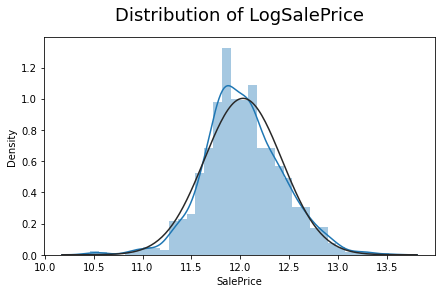

In [22]:
#we will try taking the logarithmic transformation to see if it alleviates this issue.

np.log(dftrain.SalePrice)

print(f'Skewness of LogSalePrice : {round(stats.skew(np.log(dftrain.SalePrice)),2)}')

fig = plt.figure(figsize=(7,4))
ax = sns.distplot(np.log(dftrain.SalePrice), fit=stats.norm)
ax.set_title('Distribution of LogSalePrice', size=18, y=1.05)
plt.show()

### 2.4- Exploring percentage of Missing value  

In [23]:
def variable_missing_percentage(df, save_results=False):

    percentage_missing = df.isnull().mean().sort_values(ascending=False) * 100
    percentage_missing = percentage_missing.loc[percentage_missing > 0].round(2)
    missing_variables = len(percentage_missing)
    
    if len(percentage_missing) > 0:
        print(f'There are a total of {missing_variables} variables with missing values. Percentage of total missing:')
        print("\nFeature Name: Percentage of missing value:\n")
        print(percentage_missing)
    
    else:
        print('The dataframe has no missing values in any column.')
    
    if save_results:
        return percentage_missing

In [24]:
variable_missing_percentage(dftrain)
#Drop variables with more than 80-90% missing data

There are a total of 19 variables with missing values. Percentage of total missing:

Feature Name: Percentage of missing value:

PoolQC          99.47
MiscFeature     96.27
Alley           93.68
Fence           79.83
FireplaceQu     46.88
LotFrontage     17.50
GarageType       5.56
GarageCond       5.56
GarageFinish     5.56
GarageQual       5.56
GarageYrBlt      5.56
BsmtFinType2     2.44
BsmtExposure     2.44
BsmtQual         2.36
BsmtCond         2.36
BsmtFinType1     2.36
MasVnrArea       0.53
MasVnrType       0.53
Electrical       0.08
dtype: float64


In [25]:
#Missing value of train dataset
train_missing=dftrain.isnull().sum()[dftrain.isnull().sum()>0].sort_values(ascending=False)

<AxesSubplot:>

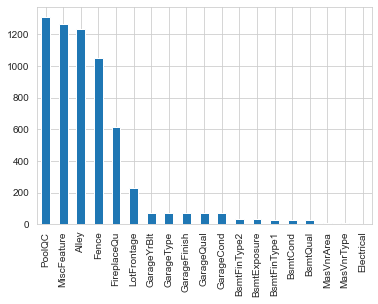

In [26]:
sns.set_style("whitegrid")
train_missing.plot.bar()

### 2.5- Splitting Numeric and categorical variable

In [27]:
def numerical_categorical_split(df):
    
    numerical_var_list = df.select_dtypes(include='number').columns.to_list()
    categorical_var_list = df.select_dtypes(include='object').columns.to_list()
    
    return numerical_var_list, categorical_var_list

In [28]:
# Creating lists of numerical and categorical features
numerical_vars, categorical_vars = numerical_categorical_split(dftrain)

# Splitting 2 dataframes, one for numeric variables and another for categorical
numerical_df = dftrain[numerical_vars]
categorical_df = dftrain[categorical_vars]

In [29]:
# Checking if both have same number of observations
print('Train Numerical variables shape:',numerical_df.shape)
print('Train Categorical variables shape:', categorical_df.shape)

Train Numerical variables shape: (1314, 33)
Train Categorical variables shape: (1314, 47)


In [30]:
# Creating lists of numerical and categorical features of test
numerical_vars_test, categorical_vars_test = numerical_categorical_split(dftest)

# Splitting 2 dataframes, one for numeric variables and another for categorical
numerical_df_test = dftest[numerical_vars_test]
categorical_df_test = dftest[categorical_vars_test]


In [31]:
# Checking if both have same number of observations of test
print('Test Numerical variables shape:',numerical_df_test.shape)
print('Test Categorical variables shape:', categorical_df_test.shape)

Test Numerical variables shape: (1605, 32)
Test Categorical variables shape: (1605, 47)


In [32]:
categorical_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [33]:
numerical_df.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

### 2-6- Exploring the frequent value of features

In [34]:
def most_frequent_value_proportion(df, threshold=0.8, verbose=True):
    
    most_frequent_pct = []
    for col in df.columns:
        most_frequent = df[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0]
        most_frequent_pct.append(np.round(most_frequent,2))
    
    most_frequent_series = pd.Series(most_frequent_pct, index=df.columns)
    most_frequent_series = most_frequent_series.loc[most_frequent_series >= threshold]
    most_frequent_series = most_frequent_series.sort_values(ascending=False)
    
    if verbose:
        print(f'The following {len(most_frequent_series)} variables have a high concentration (>{threshold*100}%) of their values in one value only.')
        print()
        print(most_frequent_series)
    
    return most_frequent_series


#### Proportion of frequent value of numerical Features

In [35]:
narrow_dist_vars = most_frequent_value_proportion(numerical_df, threshold=0.8)

The following 9 variables have a high concentration (>80.0%) of their values in one value only.

PoolArea         0.99
3SsnPorch        0.98
LowQualFinSF     0.98
MiscVal          0.96
KitchenAbvGr     0.95
BsmtHalfBath     0.94
ScreenPorch      0.92
BsmtFinSF2       0.89
EnclosedPorch    0.86
dtype: float64


#### Proportion of frequent value of categorical Features

In [36]:
highly_imbalanced_vars_list = most_frequent_value_proportion(categorical_df, threshold=0.8)

The following 21 variables have a high concentration (>80.0%) of their values in one value only.

Street           1.00
Utilities        1.00
Condition2       0.99
Heating          0.98
RoofMatl         0.98
GarageCond       0.96
GarageQual       0.95
CentralAir       0.94
LandSlope        0.94
Functional       0.93
MiscFeature      0.92
PavedDrive       0.92
BsmtCond         0.92
Electrical       0.91
LandContour      0.90
BsmtFinType2     0.88
ExterCond        0.87
Condition1       0.86
SaleType         0.86
BldgType         0.84
SaleCondition    0.82
dtype: float64


### 2-7-Bivariate Analysis 

#### Scatter Plot of numeric variables

In [37]:
def scatter_subplots(df, target, hue=None, n_cols=4, fig_size=(12,12)):
    
    independent_vars_list = list(df.columns)
    independent_vars_list.remove(target)
    num_vars = len(independent_vars_list)
    n_rows = int(np.ceil(num_vars / n_cols))
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=fig_size)
    plt.suptitle(f'Scatterplots of Independent Variables against {target}', y=1.02, size=18)

    for i, col in enumerate(independent_vars_list):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.scatterplot(x=col, y=target, hue=hue, data=df, ax=ax)
    
    plt.tight_layout()
    plt.show();

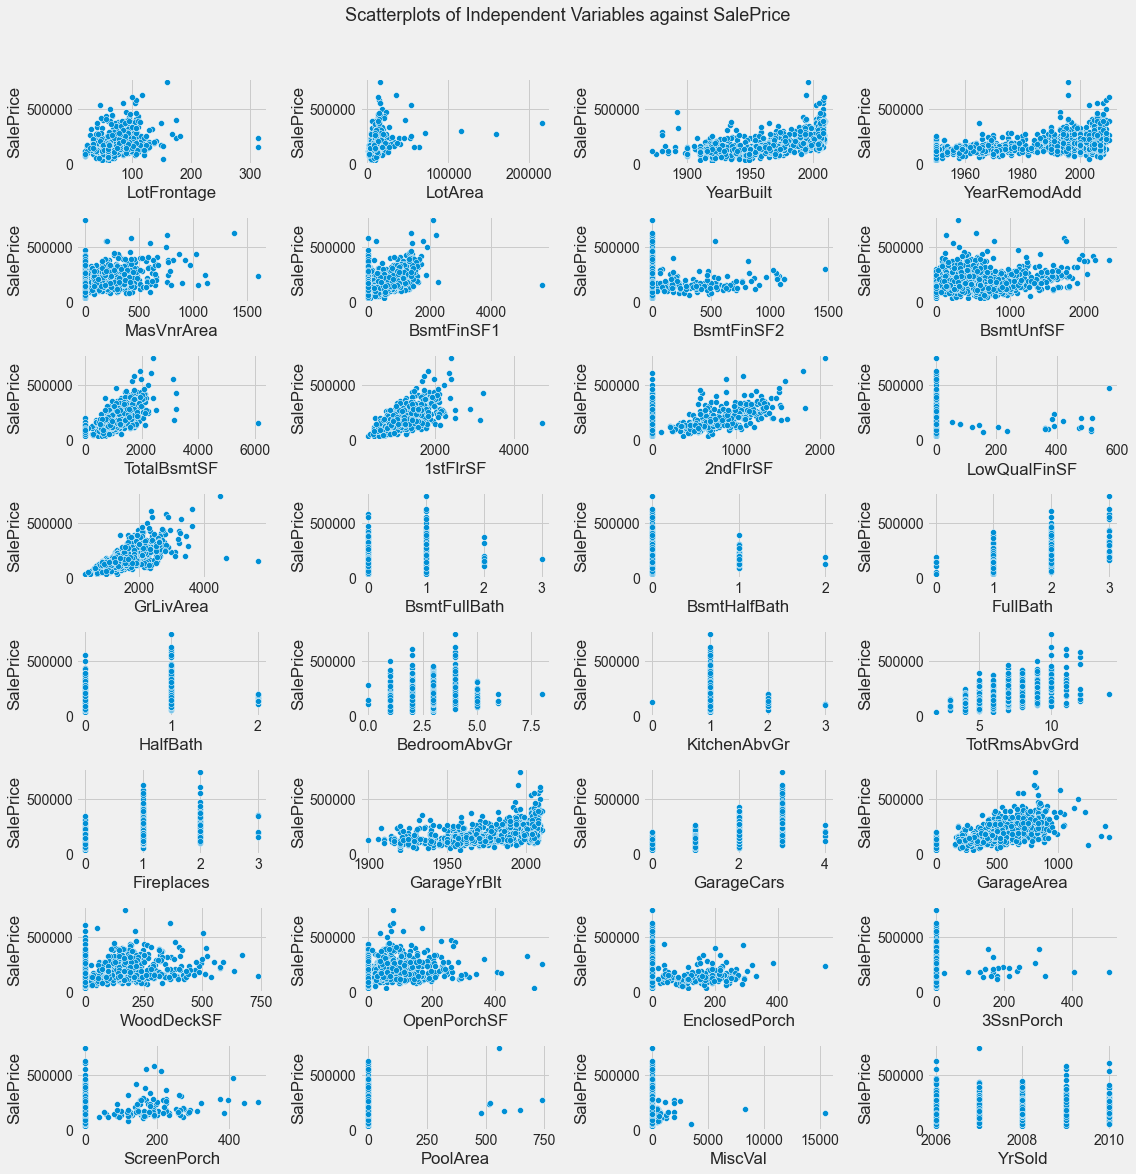

In [38]:
scatter_subplots(numerical_df, 'SalePrice', fig_size=(16,16))

#### Count Plot of Categorical Variables

In [39]:
# Finding variables that have more than 80% of their values in one category
highly_imbalanced_vars = most_frequent_value_proportion(categorical_df, threshold=0.8, verbose=False)
highly_imbalanced_vars_list = highly_imbalanced_vars.index.to_list()
print(f'The following {len(highly_imbalanced_vars)} variables have more than 80% of their data concentrated in only one class:')
print()
print(highly_imbalanced_vars)

The following 21 variables have more than 80% of their data concentrated in only one class:

Street           1.00
Utilities        1.00
Condition2       0.99
Heating          0.98
RoofMatl         0.98
GarageCond       0.96
GarageQual       0.95
CentralAir       0.94
LandSlope        0.94
Functional       0.93
MiscFeature      0.92
PavedDrive       0.92
BsmtCond         0.92
Electrical       0.91
LandContour      0.90
BsmtFinType2     0.88
ExterCond        0.87
Condition1       0.86
SaleType         0.86
BldgType         0.84
SaleCondition    0.82
dtype: float64


In [40]:
def annotate_plot(ax, dec_places=1, annot_size=14):
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.{}f'.format(dec_places)),
            (p.get_x() + p.get_width() / 2., p.get_height(),),
            ha='center', va='center',
            xytext=(0,10), textcoords='offset points', size=annot_size
        )

In [41]:
def var_categories_countplots(df, n_cols=3, orientation='v', x_rotation=45, y_rotation=0, 
                              palette='pastel', fig_size=(18,12)):
   
    categorical_vars = df.select_dtypes(exclude='number').columns.to_list()
    num_vars = len(categorical_vars)
    n_rows = int(np.ceil(num_vars / n_cols))
    
    fig = plt.figure(figsize=fig_size)
    plt.suptitle('Class Distributions for Categorical Variables', y=1.01, size=24)
    
    for i, col in enumerate(categorical_vars):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.countplot(x=df[col], ax=ax, orient=orientation, palette=palette)
        ax.set_ylabel('Frequency')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=x_rotation)
        
        annotate_plot(ax, dec_places=0, annot_size=12) # Annotating plot with count labels
    
    plt.tight_layout()
    plt.show();

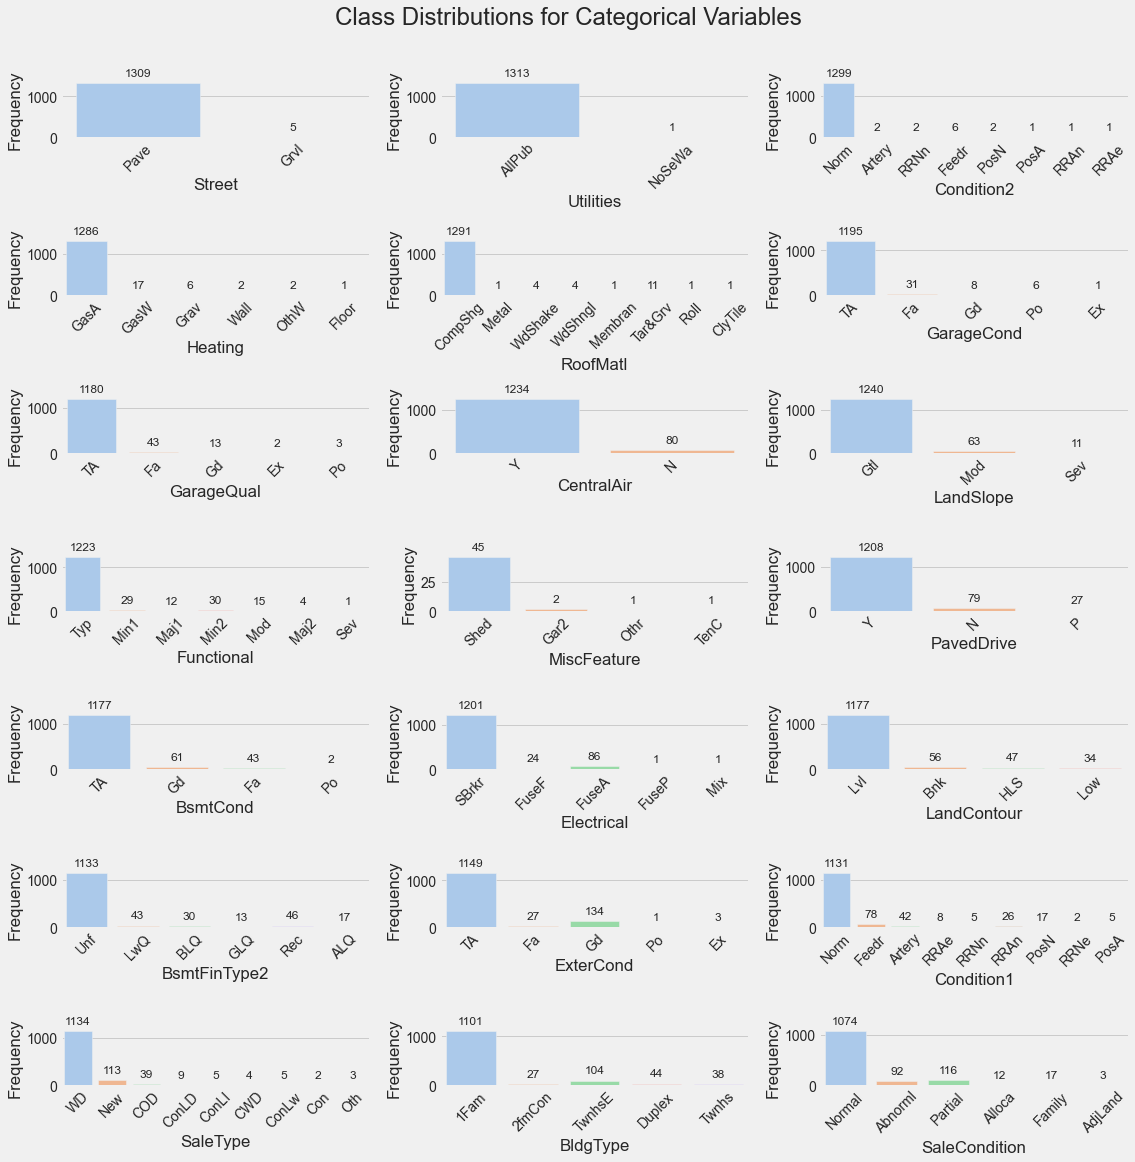

In [42]:
#count plot of highly imbalane features
var_categories_countplots(categorical_df[highly_imbalanced_vars_list], fig_size=(16,16))

### 2.8- Exploring variable's correlation
1- corrolation value and plot

2- VIF: we can calculate VIF value after impute NA value, so we will do it after imputation.

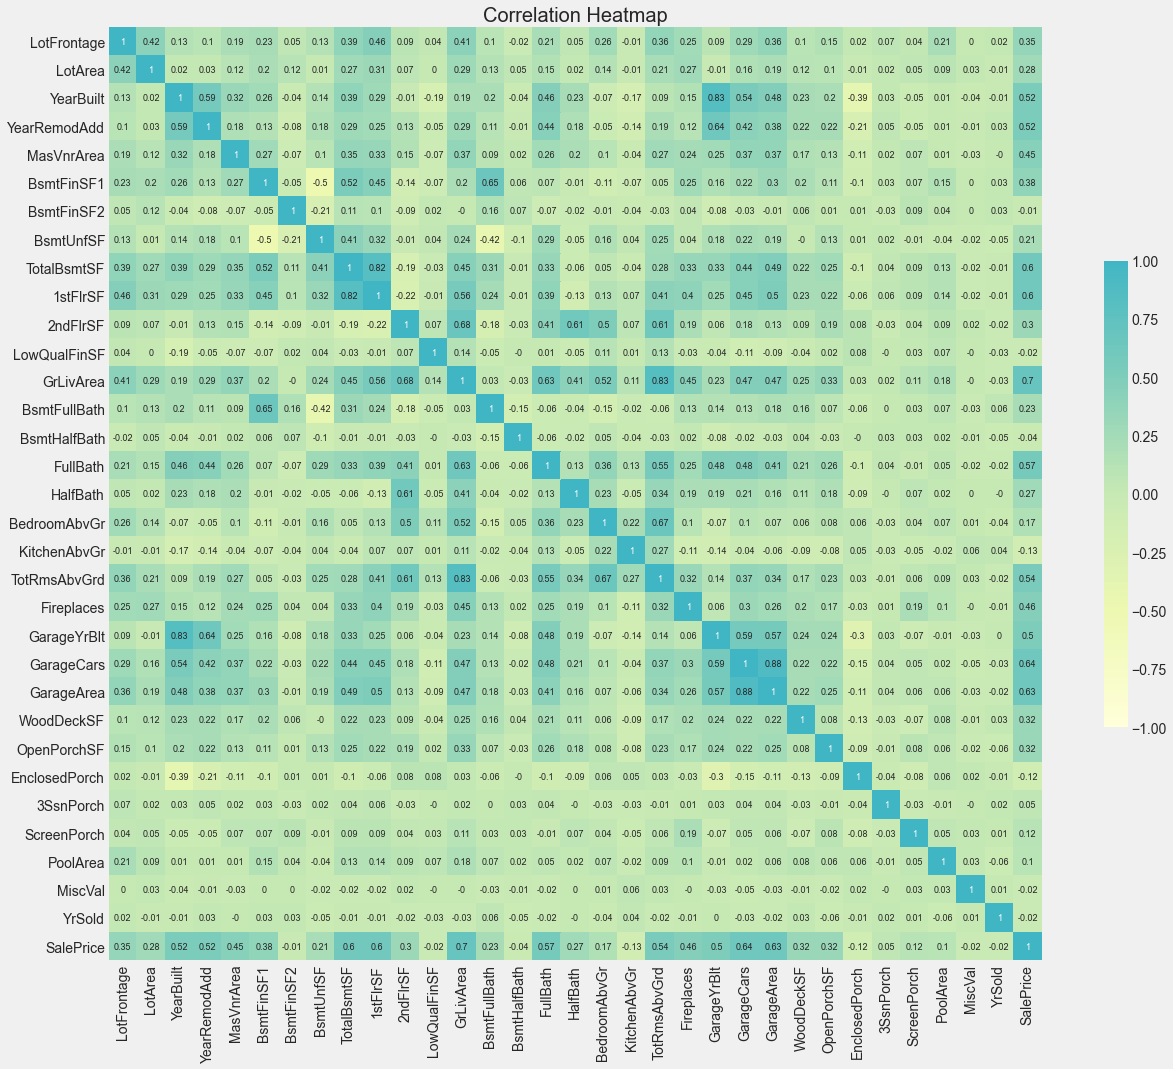

In [43]:
corr_df = numerical_df.corr().round(2) 

plt.figure(figsize=(20, 16))
plt.title('Correlation Heatmap', size=20)
sns.heatmap(corr_df, cmap="YlGnBu", annot=True, square=True, annot_kws=dict(size=9),vmin=-1, vmax=1,
            center=True, cbar=True,cbar_kws={"shrink": .5})
plt.show()

The correlation heatmap has provided us a rough idea of the relationships between the variables.


### 3- Data preparation and preprocessing 

####  3.1- Handling the missing values

There are 2 options when dealing with missing data:

1-Imputation:

2-Dropping Column / Observations

Drop variables with more than 80-90% missing data
If fraction of missing values is negligible/small compared to number of observations, drop rows that are missing data.


#### Dropping Columns with many null values

In [44]:
#The below listed columns contains many null values.So,droping them
to_drop =  ['Fence', 'Alley', 'MiscFeature', 'PoolQC']

In [45]:
#Remove colums with too many missing values
categorical_df=categorical_df.drop(to_drop,axis=1)
categorical_df_test=categorical_df_test.drop(to_drop,axis=1)

In [46]:
print(numerical_df.shape,numerical_df_test.shape)

(1314, 33) (1605, 32)


In [47]:
print(categorical_df.shape,categorical_df_test.shape)

(1314, 43) (1605, 43)


In [48]:
categorical_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Impute Missing value

In [49]:
for column in categorical_df.columns:
    categorical_df[column].fillna(value="NO",inplace=True)
        
for column in numerical_df.columns:
     numerical_df[column].fillna(value=numerical_df[column].mean(),inplace=True)

print("Train Imputation done!")

Train Imputation done!


In [50]:
for column in categorical_df_test.columns:
     categorical_df_test[column].fillna(value='NO',inplace=True)

for column in numerical_df_test.columns:
        numerical_df_test[column].fillna(value=numerical_df_test[column].mean(),inplace=True)
        
print("Test Imputation done!")

Test Imputation done!


### 3-2-Dropping useless variable

#### Variance Inflation Factor (VIF)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VRF(data, y, threshold=30):
    # Calculate VIF Factors
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["features"] = data.columns
    vif["VIF Factor"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    vif=vif.loc[vif['VIF Factor']<=threshold]
    vif=vif.sort_values('VIF Factor')
    vif=vif.reset_index()
    print()
    return vif   

In [52]:
narrow_dist_vars_vif=VRF(numerical_df.drop(['SalePrice'],axis=1),numerical_df['SalePrice'])
narrow_dist_vars_vif

,index,features,VIF Factor
0,30,MiscVal,1.026934
1,27,3SsnPorch,1.038466
2,29,PoolArea,1.110307
3,28,ScreenPorch,1.203397
4,14,BsmtHalfBath,1.218704
5,26,EnclosedPorch,1.420587
6,25,OpenPorchSF,1.804135
7,4,MasVnrArea,1.808911
8,24,WoodDeckSF,1.877924
9,1,LotArea,2.780074


#### Dropping narrowly distributed variables 

In [53]:
narrow_dist_vars = most_frequent_value_proportion(numerical_df, threshold=0.8)

The following 9 variables have a high concentration (>80.0%) of their values in one value only.

PoolArea         0.99
3SsnPorch        0.98
LowQualFinSF     0.98
MiscVal          0.96
KitchenAbvGr     0.95
BsmtHalfBath     0.94
ScreenPorch      0.92
BsmtFinSF2       0.89
EnclosedPorch    0.86
dtype: float64


In [54]:
# Dropping narrowly distributed variables
numerical_df = numerical_df.drop(narrow_dist_vars.index.to_list(), axis=1)
# Dropping narrowly distributed variables of test
numerical_df_test = numerical_df_test.drop(narrow_dist_vars.index.to_list(), axis=1)

In [55]:
print(numerical_df.shape,numerical_df_test.shape)

(1314, 24) (1605, 23)


#### Dropping highly imbalance variable

In [56]:
print(categorical_df.shape,categorical_df_test.shape)

(1314, 43) (1605, 43)


In [57]:
highly_imbalanced_vars = most_frequent_value_proportion(categorical_df, threshold=0.8, verbose=False)
#highly_imbalanced_vars_list = most_frequent_value_proportion(categorical_df, threshold=0.8)
highly_imbalanced_vars_list = highly_imbalanced_vars.index.to_list()
print(f'The following {len(highly_imbalanced_vars)} variables have more than 80% of their data concentrated in only one class:')
print()
print(highly_imbalanced_vars)

The following 20 variables have more than 80% of their data concentrated in only one class:

Street           1.00
Utilities        1.00
Condition2       0.99
RoofMatl         0.98
Heating          0.98
CentralAir       0.94
LandSlope        0.94
Functional       0.93
PavedDrive       0.92
GarageCond       0.91
Electrical       0.91
LandContour      0.90
BsmtCond         0.90
GarageQual       0.90
ExterCond        0.87
Condition1       0.86
SaleType         0.86
BsmtFinType2     0.86
BldgType         0.84
SaleCondition    0.82
dtype: float64


In [58]:
#Drop highly imbalance variable
categorical_df = categorical_df.drop(highly_imbalanced_vars_list, axis=1)
categorical_df_test = categorical_df_test.drop(highly_imbalanced_vars_list, axis=1)

In [59]:
print(categorical_df.shape,categorical_df_test.shape)

(1314, 23) (1605, 23)


### 3-3-Transform categorical variable

In [60]:
# Changing numeric variables to categorical
categorical_df = categorical_df.replace({
    'MSSubClass' : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 50 : "SC50", 60 : "SC60",
                    70 : "SC70", 75 : "SC75", 80 : "SC80", 85 : "SC85", 90: "SC90",120 : "SC120", 
                    160 : "SC160", 180 : "SC180", 190 : "SC190"},
    'MoSold' : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
})

In [61]:
# Changing numeric variables to categorical
categorical_df_test = categorical_df_test.replace({
    'MSSubClass' : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 50 : "SC50", 60 : "SC60",
                    70 : "SC70", 75 : "SC75", 80 : "SC80", 85 : "SC85", 90:"SC90",120 : "SC120", 
                    160 : "SC160", 180 : "SC180", 190 : "SC190"},
    'MoSold' : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
})

In [62]:
# Converting categorical variables to an interval scale as they are ordinal in nature.
categorical_df = categorical_df.replace({
    'ExterQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'ExterCond' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtQual' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtCond' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtExposure' : {'No' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4},
    'BsmtFinType1' : {'No' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
    'BsmtFinType2' : {'No' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
    'HeatingQC' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'KitchenQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'FireplaceQu' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'GarageFinish' : {'No' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3},
    'GarageQual' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'GarageCond' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
    
})



In [63]:
# Converting categorical variables to an interval scale as they are ordinal in nature.
categorical_df_test = categorical_df_test.replace({
    'ExterQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'ExterCond' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtQual' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtCond' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtExposure' : {'No' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4},
    'BsmtFinType1' : {'No' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
    'BsmtFinType2' : {'No' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
    'HeatingQC' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'KitchenQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'FireplaceQu' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'GarageFinish' : {'No' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3},
    'GarageQual' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'GarageCond' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
})

#### countplot of categoty variable after drop highly imbalnce features

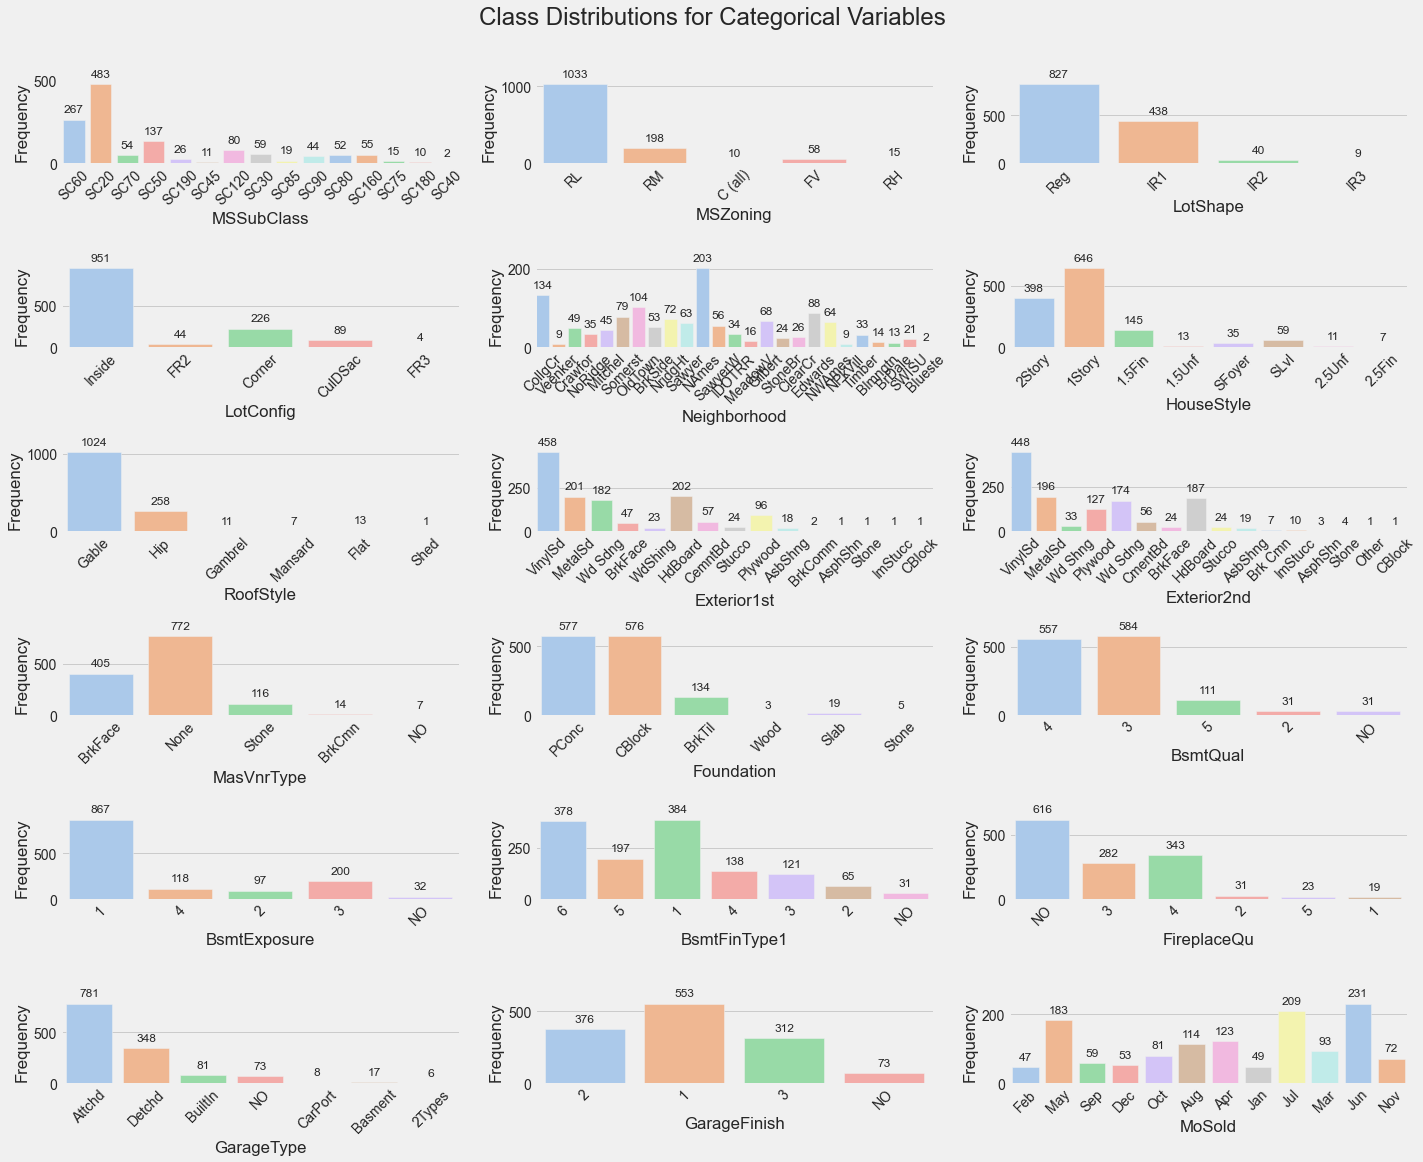

In [64]:
var_categories_countplots(categorical_df, fig_size=(20,16))

 some category features have empty or small calsses, so we combine the calsses.

In [65]:
categorical_df.MSZoning = categorical_df.MSZoning.apply(lambda x :
                                                        x if x == 'RL'
                                                        else x if x == 'RM'
                                                        else 'Others')

categorical_df.LotShape = categorical_df.LotShape.apply(lambda x :
                                                        x if x =='Reg'
                                                        else 'Irregular')

categorical_df.LotConfig = categorical_df.LotConfig.apply(lambda x :
                                                          x if x == 'Inside'
                                                          else x if x == 'CulDSac'
                                                          else x if x == 'Corner'
                                                          else 'FR')

categorical_df.RoofStyle = categorical_df.RoofStyle.apply(lambda x :
                                                          x if x =='Gable'
                                                          else x if x == 'Hip'
                                                          else 'Others')

categorical_df.MasVnrType = categorical_df.MasVnrType.apply(lambda x :
                                                            x if x == 'None'
                                                            else x if x == 'Stone'
                                                            else 'Brk')

categorical_df.Foundation = categorical_df.Foundation.apply(lambda x :
                                                            x if x =='BrkTil'
                                                            else x if x == 'CBlock'
                                                            else x if x == 'PConc'
                                                            else 'Others')

categorical_df.GarageType = categorical_df.GarageType.apply(lambda x : 
                                                            x if x == 'Attchd'
                                                            else x if x == 'BuiltIn'
                                                            else x if x == 'Detchd'
                                                            else x if x == 'NoGarage'
                                                            else 'Others')

In [66]:
categorical_df_test.MSZoning = categorical_df_test.MSZoning.apply(lambda x :
                                                        x if x == 'RL'
                                                        else x if x == 'RM'
                                                        else 'Others')

categorical_df_test.LotShape = categorical_df_test.LotShape.apply(lambda x :
                                                        x if x =='Reg'
                                                        else 'Irregular')

categorical_df_test.LotConfig = categorical_df_test.LotConfig.apply(lambda x :
                                                          x if x == 'Inside'
                                                          else x if x == 'CulDSac'
                                                          else x if x == 'Corner'
                                                          else 'FR')

categorical_df_test.RoofStyle = categorical_df_test.RoofStyle.apply(lambda x :
                                                          x if x =='Gable'
                                                          else x if x == 'Hip'
                                                          else 'Others')

categorical_df_test.MasVnrType = categorical_df_test.MasVnrType.apply(lambda x :
                                                            x if x == 'None'
                                                            else x if x == 'Stone'
                                                            else 'Brk')

categorical_df_test.Foundation = categorical_df_test.Foundation.apply(lambda x :
                                                            x if x =='BrkTil'
                                                            else x if x == 'CBlock'
                                                            else x if x == 'PConc'
                                                            else 'Others')

categorical_df_test.GarageType = categorical_df_test.GarageType.apply(lambda x : 
                                                            x if x == 'Attchd'
                                                            else x if x == 'BuiltIn'
                                                            else x if x == 'Detchd'
                                                            else x if x == 'NoGarage'
                                                            else 'Others')

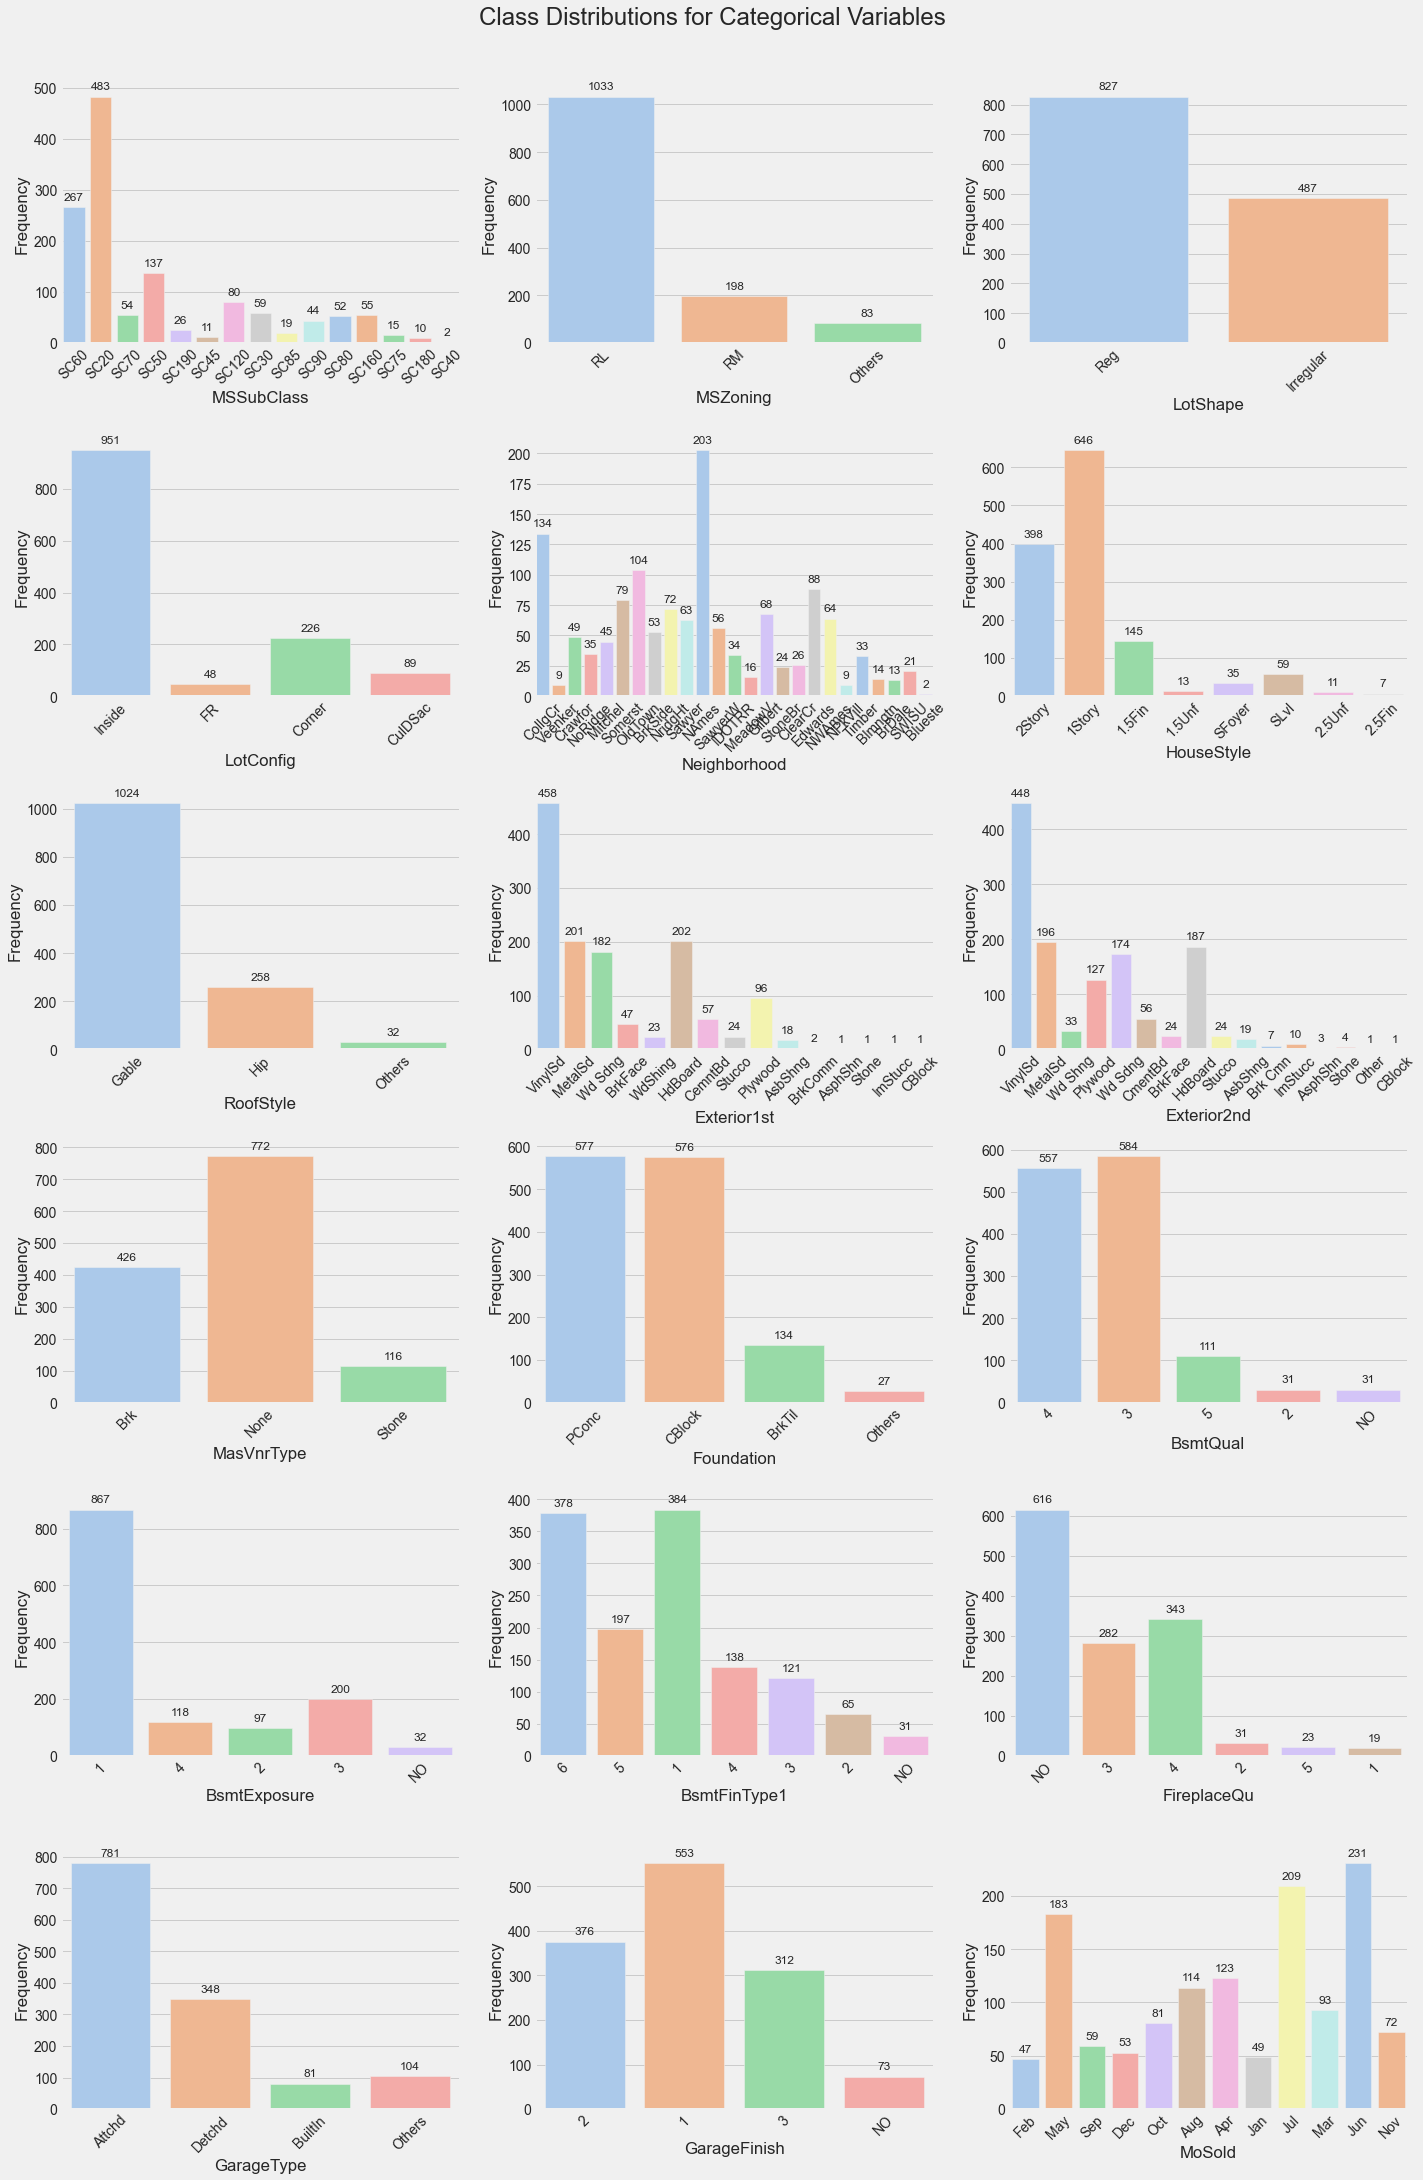

In [67]:
var_categories_countplots(categorical_df, fig_size=(20,30))

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

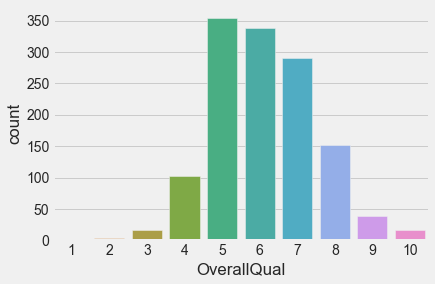

In [68]:
import seaborn as sns1
sns1.countplot(x=categorical_df["OverallQual"])

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

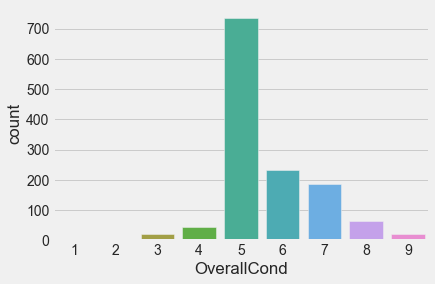

In [69]:
import seaborn as sns1
sns1.countplot(x=categorical_df["OverallCond"])

#### 3.3.2 Categorical Variables - Bivariate Analysis

In [70]:
categorical_df['SalePrice']=numerical_df['SalePrice']

In [71]:
def var_categories_boxplots(df, target, hue=None, n_cols=3, orientation='v', x_rotation=45, y_rotation=0, palette='pastel', fig_size=(18,12)):
    
    categorical_vars = df.select_dtypes(exclude='number').columns.to_list()
    num_vars = len(categorical_vars)
    n_rows = int(np.ceil(num_vars / n_cols))
    
    fig = plt.figure(figsize=fig_size)
    plt.suptitle('Categorical Variables vs Target', y=1.01, size=24)
    
    for i, col in enumerate(categorical_vars):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.boxplot(x=df[col], y=df[target], ax=ax, hue=hue, orient=orientation, palette=palette)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=x_rotation)
    
    plt.tight_layout()
    plt.show();

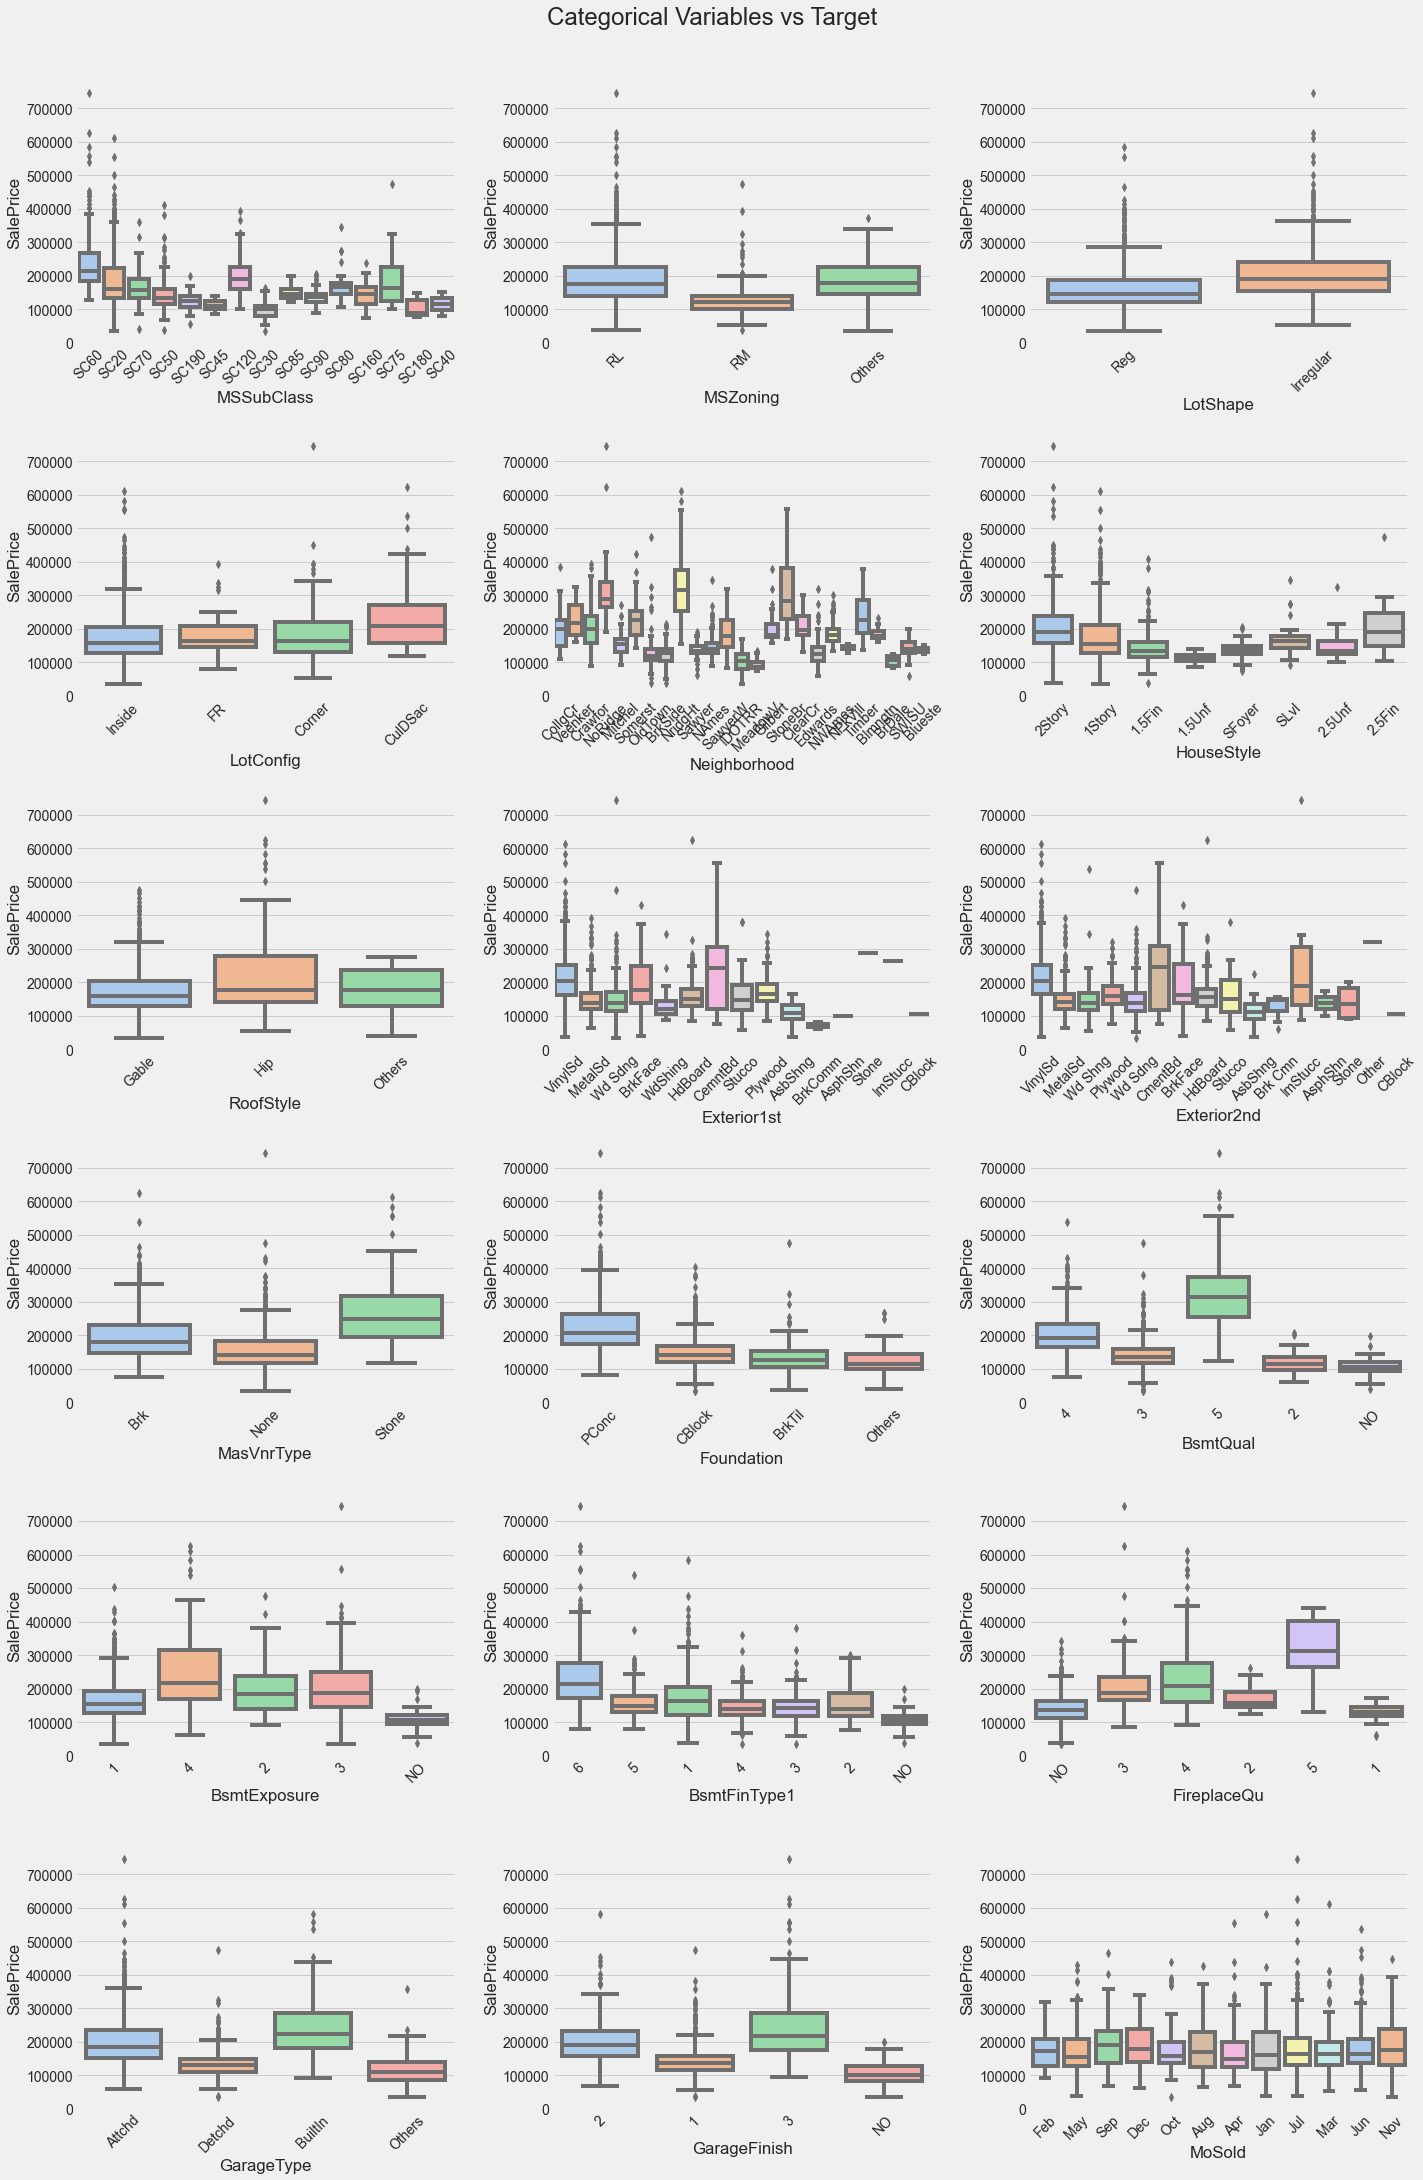

In [72]:
var_categories_boxplots(categorical_df, 'SalePrice', n_cols=3, fig_size=(20,30))

In [73]:
categorical_df.drop('SalePrice', axis=1,inplace=True)

### 3-4- Finding outliers for each feature:

#### solution 1: Use outlier finding algorithm such as  OneClassSVM
#### solution2: Use IQR method

#solution 1

#https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
#https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
#https://www.datatechnotes.com/2020/04/anomaly-detection-with-one-class-svm.html
dfggg=numerical_df.copy()

from sklearn.svm import OneClassSVM

print(dfggg.shape)

ee = OneClassSVM(nu=0.01)#,kernel='rbf',gamma='auto')
pred = ee.fit_predict(dfggg)

dfggg=dfggg.iloc[np.where(pred!=-1)]
print()
print(dfggg.shape)

### Solution2: IQR

In [74]:
print(numerical_df.shape,numerical_df_test.shape)

(1314, 24) (1605, 23)


In [75]:
def out_find(numerical_features,categorical_features):
    
    overall_qual_drop=[]

    for feature in numerical_features: 
       
        # lets point out some outliers
        q1,q3 = np.percentile(numerical_features[feature] , [25,75]) 
        IQR = q3 - q1
        lower_range = q1 - (3 * IQR) 
        upper_range = q3 + (3 * IQR) 
        
        overall_qual_drop = numerical_features[(numerical_features[feature] < lower_range) | (numerical_features[feature] > upper_range)]
        
        #Finally, drop the outliers
        if (len(overall_qual_drop>0)):
            print('Fearure Name: {}'.format(feature))
            print('Number of outliers: {}'.format(len(overall_qual_drop)))
            numerical_features.drop(overall_qual_drop.index, axis=0, inplace=True)
            categorical_features.drop(overall_qual_drop.index, axis=0, inplace=True)
            print("----  outlier dropped -------")
       
        
        

In [76]:
out_find(numerical_df,categorical_df)

Fearure Name: LotFrontage
Number of outliers: 14
----  outlier dropped -------
Fearure Name: LotArea
Number of outliers: 26
----  outlier dropped -------
Fearure Name: MasVnrArea
Number of outliers: 21
----  outlier dropped -------
Fearure Name: TotalBsmtSF
Number of outliers: 3
----  outlier dropped -------
Fearure Name: 1stFlrSF
Number of outliers: 1
----  outlier dropped -------
Fearure Name: BedroomAbvGr
Number of outliers: 1
----  outlier dropped -------
Fearure Name: GarageArea
Number of outliers: 1
----  outlier dropped -------
Fearure Name: WoodDeckSF
Number of outliers: 1
----  outlier dropped -------
Fearure Name: OpenPorchSF
Number of outliers: 16
----  outlier dropped -------
Fearure Name: SalePrice
Number of outliers: 5
----  outlier dropped -------


In [77]:
out_find(numerical_df_test,categorical_df_test)

Fearure Name: LotFrontage
Number of outliers: 15
----  outlier dropped -------
Fearure Name: LotArea
Number of outliers: 21
----  outlier dropped -------
Fearure Name: MasVnrArea
Number of outliers: 28
----  outlier dropped -------
Fearure Name: GrLivArea
Number of outliers: 1
----  outlier dropped -------
Fearure Name: GarageYrBlt
Number of outliers: 1
----  outlier dropped -------
Fearure Name: GarageArea
Number of outliers: 1
----  outlier dropped -------
Fearure Name: WoodDeckSF
Number of outliers: 2
----  outlier dropped -------
Fearure Name: OpenPorchSF
Number of outliers: 15
----  outlier dropped -------


### 3-5-Scaling numerical columns

In [79]:
y=numerical_df['SalePrice']
numerical_df.drop('SalePrice', axis=1,inplace=True,errors='ignore')

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for column in numerical_df:
    numerical_df[column] = scaler.fit_transform(numerical_df[column].values.reshape(-1,1))
for column in numerical_df_test:    
    numerical_df_test[column] = scaler.fit_transform(numerical_df_test[column].values.reshape(-1,1))

### 3-6-Encoding categorical columns

In [81]:
print(numerical_df.shape,numerical_df_test.shape)

(1225, 23) (1521, 23)


In [82]:
print(categorical_df.shape,categorical_df_test.shape)

(1225, 23) (1521, 23)


In [83]:
df_temp_train = pd.concat([numerical_df,categorical_df], axis=1).reset_index(drop=True)
df_temp_test = pd.concat([numerical_df_test,categorical_df_test], axis=1).reset_index(drop=True)

In [84]:
df_temp_train['train']=1
df_temp_test['train']=0

In [85]:
dff_temp=pd.concat([df_temp_train,df_temp_test])
dff_temp.shape

(2746, 47)

In [86]:
dff_temp= pd.get_dummies(dff_temp)
dff_temp.shape

(2746, 177)

In [87]:
train_dff=dff_temp[dff_temp['train']==1]
test_dff=dff_temp[dff_temp['train']==0]
train_dff.drop(['train'],axis=1,inplace=True)
test_dff.drop(['train'],axis=1,inplace=True)

In [88]:
print(train_dff.shape, test_dff.shape)

(1225, 176) (1521, 176)


In [89]:
train_dff.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'MoSold_Dec', 'MoSold_Feb', 'MoSold_Jan', 'MoSold_Jul', 'MoSold_Jun',
       'MoSold_Mar', 'MoSold_May', 'MoSold_Nov', 'MoSold_Oct', 'MoSold_Sep'],
      dtype='object', length=176)

### 3-7-Split data to train and test

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_dff, y, test_size=0.2,random_state=42)

### 4. Modelling

In [91]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred): 
    return np.sqrt(mean_squared_error(y_true, y_pred))

### 4-1-XGBoost Algorithm
#https://www.kaggle.com/joshuayeo95/house-prices-preprocessing-eda-modelling/notebook

In [92]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

xgb = xgboost.XGBRegressor(random_state=42)

params = {'n_estimators': [200,300,350,400],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': range(2, 5)}

clf = RandomizedSearchCV(xgb, params)
clf.fit(x_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, reg_alpha=None,
                                          reg_lambda=None,
       

In [94]:
clf.best_params_

{'n_estimators': 350, 'max_depth': 2, 'learning_rate': 0.1}

#### Feature Importance:

<AxesSubplot:>

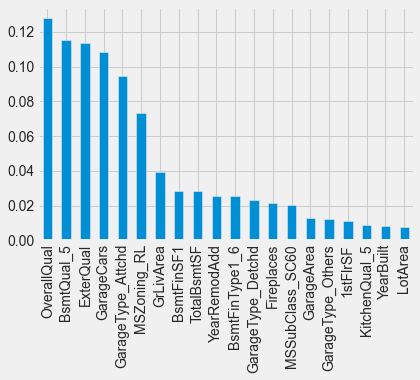

In [93]:
xgb = clf.best_estimator_
xgb_score = clf.best_score_
xgb_importance = xgb.feature_importances_

pd.Series(data=xgb.feature_importances_,index=x_train.columns).sort_values(ascending=False).head(20).plot.bar()

In [126]:
xgb_coefs = pd.Series(xgb.feature_importances_, index=x_train.columns)

zero_coefs_xgb = xgb_coefs.loc[xgb_coefs == 0].index.to_list()

print(f'Original training data frame had {x_train.shape[1]} variables.')
print(f'XGBOOST selection removed {len(zero_coefs_xgb)} variables.')
print(f'Number of variables with non-zero coefficients : {x_train.shape[1] - len(zero_coefs_xgb)}')

Original training data frame had 176 variables.
XGBOOST selection removed 94 variables.
Number of variables with non-zero coefficients : 82


#### Model Evaluation

In [96]:
print('Best AUC Score: {}'.format(xgb_score))

Best AUC Score: 0.8992872989464106


In [97]:
y_pred_xgb = xgb.predict(x_test)

In [98]:
print("XGBOOST score on test set: ", rmse(y_test, y_pred_xgb))

XGBOOST score on test set:  20235.645275119838


In [99]:
y_pred_train = xgb.predict(x_train)

In [100]:
print("XGBOOST score on training set: ", rmse(y_train, y_pred_train))

XGBOOST score on training set:  11428.826991187756


### 4-2-GradianBoosting Algorithm

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_tuned = GradientBoostingRegressor(random_state=42)

params = {'loss':['ls', 'huber'],
         'learning_rate':[0.06, 0.08, 0.1, 0.12, 0.14],
         'max_depth':[1, 3, 5, 7, None],
         'min_samples_split':[2, 3, 4, 5]}

gs_cv = RandomizedSearchCV(gbr_tuned, params)
gs_cv.fit(x_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.06, 0.08, 0.1, 0.12,
                                                          0.14],
                                        'loss': ['ls', 'huber'],
                                        'max_depth': [1, 3, 5, 7, None],
                                        'min_samples_split': [2, 3, 4, 5]})

In [103]:
gs_cv.best_params_

{'min_samples_split': 4,
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.08}

#### Feature Importance:

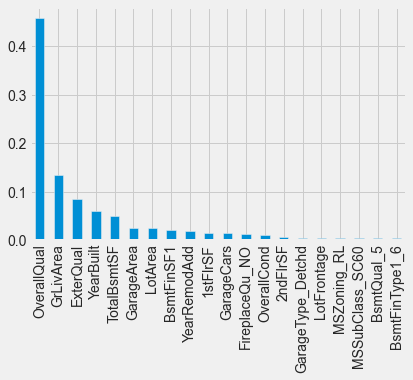

In [102]:
gbr_tuned = gs_cv.best_estimator_
gbr_score = gs_cv.best_score_
gbr_importance = gbr_tuned.feature_importances_

pd.Series(data= gbr_tuned.feature_importances_,index=x_train.columns).sort_values(ascending=False).head(20).plot.bar();

In [104]:
gbr_coefs = pd.Series(gbr_tuned.feature_importances_, index=x_train.columns)

zero_coefs_gbr = gbr_coefs.loc[gbr_coefs == 0].index.to_list()

print(f'Original training data frame had {x_train.shape[1]} variables.')
print(f'GradianBOOST selection removed {len(zero_coefs_gbr)} variables.')
print(f'Number of variables with non-zero coefficients : {x_train.shape[1] - len(zero_coefs_gbr)}')

Original training data frame had 176 variables.
GradianBOOST selection removed 101 variables.
Number of variables with non-zero coefficients : 75


#### Model Evaluation

In [106]:
y_pred_train_gbr = gbr_tuned.predict(x_train)

print("Gradian Boosting score on training set: ", rmse(y_train, y_pred_train_gbr))

Gradian Boosting score on training set:  14086.358564195554


In [107]:
y_pred_gbr = gbr_tuned.predict(x_test)

print("Gradian Boosting score on test set: ", rmse(y_test, y_pred_gbr))

Gradian Boosting score on test set:  20898.082574704953


In [105]:
print('Best AUC Score: {}'.format(gbr_score))

Best AUC Score: 0.8925532374494096


### 4-3-LASSO Algorithm

In [108]:
from sklearn.linear_model import Lasso

lasso_params = {'alpha':[5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0 ]}

ls=Lasso(random_state=42)

lasso_GS = RandomizedSearchCV(ls, lasso_params)
lasso_GS.fit(x_train, y_train)

RandomizedSearchCV(estimator=Lasso(random_state=42),
                   param_distributions={'alpha': [5, 0.5, 0.05, 0.005, 0.0005,
                                                  1, 0.1, 0.01, 0.001, 0.0001,
                                                  0]})

In [109]:
lasso_GS.best_params_

{'alpha': 5}

#### Feature Importance:

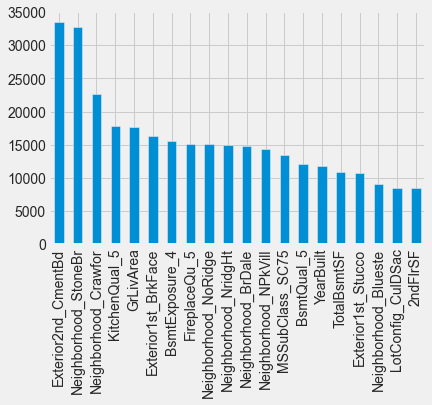

In [110]:
lasso_tuned = lasso_GS.best_estimator_
lasso_score = lasso_GS.best_score_
lasso_importance = lasso_tuned.coef_

pd.Series(data=lasso_importance,index=x_train.columns).sort_values(ascending=False).head(20).plot.bar();

In [111]:
lasso_coefs = pd.Series(lasso_importance, index=x_train.columns)

zero_coefs_lasso = lasso_coefs.loc[lasso_coefs == 0].index.to_list()

print(f'Original training data frame had {x_train.shape[1]} variables.')
print(f'Lasso selection removed {len(zero_coefs_lasso)} variables.')
print(f'Number of variables with non-zero coefficients : {x_train.shape[1] - len(zero_coefs_lasso)}')

Original training data frame had 176 variables.
Lasso selection removed 29 variables.
Number of variables with non-zero coefficients : 147


#### Model Evaluation

In [112]:
y_pred_train_lasso = lasso_GS.predict(x_train)
print("Lasso score on training set: ", rmse(y_train, y_pred_train_lasso))

Lasso score on training set:  16971.33711098766


In [115]:
y_pred_lasso = lasso_GS.predict(x_test)
print("Lasso score on test set: ", rmse(y_test, y_pred_lasso))

Lasso score on test set:  20722.603891572886


In [114]:
print('Best AUC Score: {}'.format(lasso_score))

Best AUC Score: 0.9034266127367777


### 4-4-ElasticNet

In [116]:
from sklearn.linear_model import ElasticNet

parametersGrid = {"max_iter": [1, 5, 10,20,50,100,200],
                   "alpha":[5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0 ]  }

en = ElasticNet(random_state=42)

en_GS = RandomizedSearchCV(en,parametersGrid)

en_GS.fit(x_train,y_train)

RandomizedSearchCV(estimator=ElasticNet(random_state=42),
                   param_distributions={'alpha': [5, 0.5, 0.05, 0.005, 0.0005,
                                                  1, 0.1, 0.01, 0.001, 0.0001,
                                                  0],
                                        'max_iter': [1, 5, 10, 20, 50, 100,
                                                     200]})

In [117]:
en_GS.best_params_

{'max_iter': 50, 'alpha': 0.1}

#### Feature Importance:

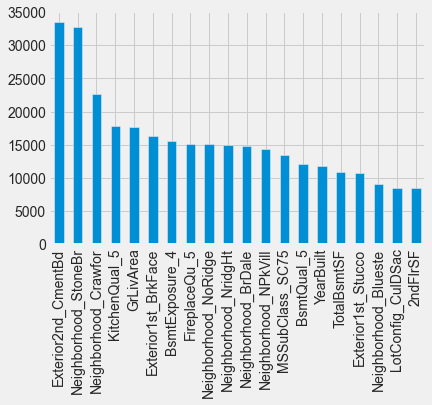

In [118]:
en_estimator = en_GS.best_estimator_
en_score = en_GS.best_score_
en_importance = en_estimator.coef_

pd.Series(data=lasso_importance,index=x_train.columns).sort_values(ascending=False).head(20).plot.bar();

In [119]:
en_coefs = pd.Series(en_importance, index=x_train.columns)

zero_coefs_en = en_coefs.loc[en_coefs == 0].index.to_list()

print(f'Original training data frame had {x_train.shape[1]} variables.')
print(f'ElasticNet selection removed {len(zero_coefs_en)} variables.')
print(f'Number of variables with non-zero coefficients : {x_train.shape[1] - len(zero_coefs_en)}')

Original training data frame had 176 variables.
ElasticNet selection removed 6 variables.
Number of variables with non-zero coefficients : 170


#### Model Evaluation

In [124]:
y_pred_en = en_GS.predict(x_test)
print("ElasticNet score on test set: ", rmse(y_test, y_pred_en))

ElasticNet score on test set:  21206.103298893027


In [121]:
en_preds_train = en_GS.predict(x_train)
print("ElasticNet score on training set: ", rmse(y_train, en_preds_train))

ElasticNet score on training set:  18797.05711703245


In [122]:
print('Best AUC Score: {}'.format(en_score))

Best AUC Score: 0.9035020509328874


### 5-  Models Evaluation:

In [127]:
input=pd.DataFrame({'Model':['XGBOOST','GRADIANBOOSTING','Lasso','ElasticNet'],
      'RMSE':[rmse(y_test,y_pred_xgb),
              rmse(y_test, y_pred_gbr),
              rmse(y_test, y_pred_lasso),
              rmse(y_test, y_pred_en)],
                   'Zero_variable_count':[len(zero_coefs_xgb),len(zero_coefs_gbr), 
                                          len(zero_coefs_lasso),len(zero_coefs_en)]})
input.sort_values(by='RMSE')

,Model,RMSE,Zero_variable_count
0,XGBOOST,20235.645275,94
2,Lasso,20722.603892,29
1,GRADIANBOOSTING,20898.082575,101
3,ElasticNet,21206.103299,6


### XGBOOST is the best model with the least error.

### 6- Add Predicted Price to Test dataset (test_data.csv)

In [129]:
y_pred_test_dataset =  xgb.predict(test_dff)
test_dff['SalePricepred']=y_pred_test_dataset
test_dff.to_csv('predicted_test.csv') 


### 7- Saving the Models

In [128]:
import pickle
filename1 = 'finalized_model_XBOOST.sav'
pickle.dump(xgb, open(filename1, 'wb'))

filename2 = 'finalized_model_RGB.sav'
pickle.dump(gbr_tuned, open(filename2, 'wb'))

filename3 = 'finalized_model_lasso.sav'
pickle.dump(ls, open(filename3, 'wb'))

filename4 = 'finalized_model_Elastic.sav'
pickle.dump(en, open(filename4, 'wb'))


### 8- Prepare data for part 2 

In [78]:
#prepare X variable for part 2 of project
X=pd.concat([numerical_df,categorical_df], axis=1).reset_index(drop=True)

In [88]:
import pickle
filename1 = 'finalized_model_XBOOST.sav'
loaded_model = pickle.load(open(filename1, 'rb'))

In [89]:
#Add Predicted Price to X-related to part2
X['SalePricepred'] =  loaded_model.predict(train_dff)
# Save X to a dataset
X.to_csv('predicted_train.csv') 


### XGBOOST Algorithm with small dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train_small, x_test_small, y_train_small, y_test_small = train_test_split(train_dff.drop(zero_coefs_xgb,axis=1), y, test_size=0.2,random_state=42)

In [ ]:
#train model with small dataset and the best parameters
xgbsmall = xgboost.XGBRegressor(random_state=42)

paramssmall = {'n_estimators': [300,350,400,450],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': range(2, 5)}

clfsmall = RandomizedSearchCV(xgbsmall, paramssmall)
clfsmall.fit(x_train_small, y_train_small)



In [ ]:
xgbsmall = clfsmall.best_estimator_
xgbsmall_score = clfsmall.best_score_
xgbsmall_importance = xgbsmall.feature_importances_

pd.Series(data=xgbsmall.feature_importances_,index=x_train_small.columns).sort_values(ascending=False).head(20).plot.bar();

In [ ]:
clfsmall.best_params_

In [ ]:
y_pred_train_small = xgbsmall.predict(x_train_small)
print("XGBOOST small score on training set: ", rmse(y_train_small, y_pred_train_small))

In [ ]:
y_pred_test_small = xgbsmall.predict(x_test_small)
print("XGBOOST small score on test set: ", rmse(y_test_small, y_pred_test_small))

### Lasso Algorithm with small dataset

In [ ]:
lasso_params_small = {'alpha':[5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0 ]}

ls_small=Lasso(random_state=42)

lasso_GS_small = RandomizedSearchCV(ls_small, lasso_params_small)
lasso_GS_small.fit(x_train_small, y_train_small)

In [ ]:
lasso_GS_small.best_params_

In [ ]:
lasso_estimator_small = lasso_GS_small.best_estimator_
lasso_score_small = lasso_GS_small.best_score_
lasso_importance_small = lasso_estimator_small.coef_

pd.Series(data=lasso_importance_small,index=x_train_small.columns).sort_values(ascending=False).head(20).plot.bar();



In [ ]:
y_pred_train_lasso_small = lasso_GS_small.predict(x_train_small)
print("Lasso score on training set: ", rmse(y_train_small, y_pred_train_lasso_small))

In [ ]:
y_pred_test_lasso_small = lasso_GS_small.predict(x_test_small)
print("Lasso score on training set: ", rmse(y_test_small, y_pred_test_lasso_small))


In [ ]:
input=pd.DataFrame({'Model':['XGBOOST','Lasso'],
      'RMSE':[rmse(y_test_small,y_pred_test_small), rmse(y_test_small, y_pred_test_lasso_small) ]})
                  
input.sort_values(by='RMSE')